[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OlivierGeorgeon/bac_a_sable/blob/master/lin_reg.ipynb)

# Régression Linéaire

Implémentation d'un algorithme de régression linéaire basé sur le tutoriel  https://www.python-engineer.com/courses/mlfromscratch/02_linearregression/

On veut pouvoir prédire la valeur $y$ pour n'importe quelle valeurs de $x$ en approximant leur relation par une fonction linéaire: 

$\hat y = w . x +b$

Voir la figure: les points noirs sont les points connus. La droite bleue est la droite qui donne la valeur estimée $\hat y$ en approximant le nuage de points au mieux.

![Linear Regression](lin_reg.png)

Le problème est de trouver les valeurs de $w$ et de $b$ qui définissent la droite.
Pour cela on définit une *cost function*. 

## Cost Function

On évalue la distance moyenne entre chaque point point connu et la droite par la *la Mean Squared Error*:

$MSE = J(w, b) = \frac{1}{N} \sum_{i=1}^{n} (y_i - (wx_i +b))^2$

On cherche le minimum de cette fonction de façon à trouver la droite qui constitue la meilleure approximation. 

On se rappelle de nos cours de math. Pour trouver le minimum d'une fonction il nous faut sa dérivée.

Dans notre cas on calcule la dérivée de $J$ par rapport à ses deux arguments $w$ et $b$:

$J'(w, b) = \begin{bmatrix} \frac{dJ}{dw} \\ \frac{dJ}{db} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum_{i=1}^{n} { -2x_i(y_i - (wx_i +b))} \\ \frac{1}{N}\sum_{i=1}^{n} {-2(y_i - (wx_i +b))} \end{bmatrix}$

Pour se convaincre du calcul de dérivé, voir ici https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#gradient-descent 

## Gradient descent

On suit la pente la plus forte jusqu'a arriver au minimum.

![gradient descent](gradient_descent.png)

On modifie les valeurs de $w$ et $b$ à chaque itération suivant la pente selon une *update function* qui les modifie à chaque itération.
$w= w -\alpha . dw$  
$b= b -\alpha . db$

Le coefficient $\alpha$ est le *learning rate*. 
Il faut le choisir avec soin. S'il est trop faible, l'apprentissage demandera beaucoup de calculs. S'il est trop élevé l'apprentissage sera instable et risque de ne jamais trouver le minimum:

<img src="learning_rate.png" alt="description" style="width:50%;" />

La pente est donnée par $dw$ et $db$, en anglais *gradient*. Il est connus à partir de la dérivée $J'$ de la *cost function* vue plus haut. On peut les reformuler en: 
$dw = \frac{1}{N} \sum_{i=1}^{n} {2x_i(\hat y - y_i)}$  
$db = \frac{1}{N} \sum_{i=1}^{n} {2(\hat y - y_i)}$  
avec  
$\hat y = wx_i + b$


## Le code

In [11]:
import numpy as np

### La class LinearRegression

* L'attribut `self.weights` stockes le coefficient $w$. C'est un vecteur de dimension égale au nombre de *features* (dans notre exemple: 1).  
* L'attribut `self.bias` stockes la constante $b$.

Pour chaque iteration de l'entrainement, la variable `v_predicted` stocke le valeur prédite $\hat y = w . x +b$.
Dans notre exemple, le nombre de *features* est 1 mais cette méthode fonctionne avec un nombre supérieur.  
Le produit $w . x$ est le produit scalaire (*dot product*) entre le vecteur des poids (*weights*) et le vecteur des *features*. 
`v_predicted` est un vecteur qui contient la prediction de chaque *feature*.

La valeur d'upgrade $dw$ est un vecteur de dimension égale au nombre de features. On le calcule en une ligne par un produit scalaire entre la transposée des échantillons $X.T$ et le vecteur des écarts (`y_predicted` - y).
Le facteur 2 de la formule est omis car il entre dans le *learning rate*.

In [22]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters at zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# On teste avec des données

In [ ]:
!pip install scikit-learn

On récupère 100 échantillons qu'on répartit en 80 échantillons d'entrainement et 20 échantillons de test

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=4
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

Voyons à quoi nos données d'entrainement ressemblent

<function matplotlib.pyplot.show(close=None, block=None)>

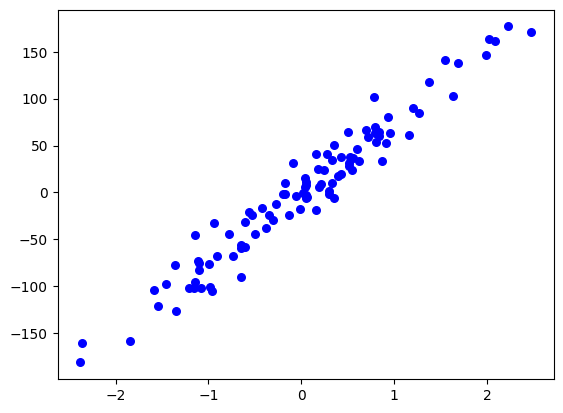

In [17]:
fig = plt.figure()
plt.scatter(X[:, 0], y, color="b", marker ="o", s=30)
plt.show

Vérifions que nous avons bien 80 échantillons d'entrainement qui ont chacun 1 feature, et 80 labels. 

In [18]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


On implémente la Mean Square Error définie précédement

In [24]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [34]:
regressor = LinearRegression(learning_rate=0.001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 783.8155465125494


Avec un learning_rate de 0.001 On voit que l'erreur est élevée. Regardons à quoi ressemblent nos données


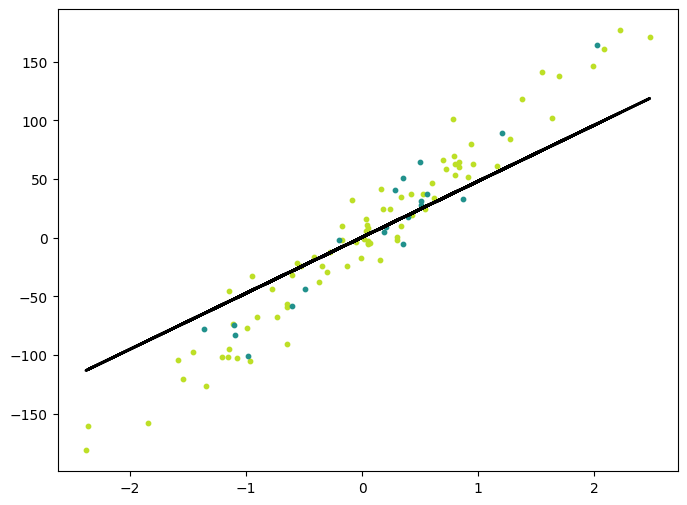

In [35]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

# Sujet du TP

Trouver un learning rate et un nombre d'itérations qui optimisent l'apprentissage 

Une fois l'apprentissage effectué. Vérifier la prédiction pour quelques exemples de $x$. 

Afficher une figure qui montre les échantillons d'entrainement, la droite de régression, et les points que vous avez utilisés pour tester les predictions.

Expliquez ce que vous avez fait
